# Fruit Image Classification using Convolutional Neural Network (CNN)

This documentation provides an overview and step-by-step explanation of a Python script that performs fruit image classification using a Convolutional Neural Network (CNN). The script involves several steps, including creating a CSV file to store image paths and labels, loading and preprocessing the image data, building the CNN model, training the model, and making predictions on new images.

## Table of Contents

1. Introduction
2. Requirements
3. Dataset
4. CSV File Generation
5. Image Preprocessing
6. Building the CNN Model
7. Model Training
8. Evaluation and Visualization
9. Making Predictions on New Images

## 1. Introduction

This script aims to classify fruit images into three categories: apple, banana, and mango. It utilizes the Keras library to build a CNN model and leverages pandas and numpy for data manipulation and preprocessing.

## 2. Requirements

The following libraries are required to run the script:

- `os`: For handling file and directory operations.
- `csv`: For reading and writing CSV files.
- `numpy`: For numerical computations and data manipulation.
- `pandas`: For handling data in tabular format (CSV).
- `matplotlib`: For data visualization.
- `keras`: For building and training the CNN model.
- `scikit-learn`: For data preprocessing and label encoding.

## 3. Dataset

The fruit image dataset is assumed to be organized in the following directory structure:

```
data/
  |- apple/
  |  |- apple_image1.jpg
  |  |- apple_image2.jpg
  |  ...
  |- banana/
  |  |- banana_image1.jpg
  |  |- banana_image2.jpg
  |  ...
  |- mango/
  |  |- mango_image1.jpg
  |  |- mango_image2.jpg
  |  ...
```

## 4. CSV File Generation

The first step is to create a CSV file named `fruit_data.csv` that contains the image paths and corresponding fruit labels. The `create_csv_file` function is responsible for generating this file. It iterates through each fruit type folder in the specified root directory, reads the image filenames, and writes the image paths and corresponding fruit types to the CSV file.

## 5. Image Preprocessing

The script loads the data from the `fruit_data.csv` file into a pandas DataFrame. The fruit labels are then converted into numerical format using Label Encoding. The image data is preprocessed by resizing the images to a fixed size (e.g., 128x128 pixels) and normalizing pixel values between 0 and 1.

## 6. Building the CNN Model

The CNN model architecture consists of three convolutional layers with ReLU activation, followed by max-pooling layers, a flatten layer, and two fully connected (dense) layers with ReLU and softmax activation functions, respectively. The model is compiled with the Adam optimizer and categorical cross-entropy loss function.

## 7. Model Training

The dataset is split into training and testing sets using a test size of 20%. The CNN model is then trained on the training data using the `fit` method. The training process is performed over multiple epochs, and the training and validation accuracy are recorded for visualization.

## 8. Evaluation and Visualization

After training, the model's performance is evaluated on the test dataset using the `evaluate` method. The test loss and accuracy are printed to the console. Additionally, the training and validation accuracy over epochs are visualized using matplotlib.

## 9. Making Predictions on New Images

To make predictions on new images, the script loads a new image from the file path and preprocesses it similarly to the training data. The preprocessed image is then fed into the trained CNN model using the `predict` method. The output contains softmax probabilities for each class, and the class label with the highest probability is considered as the predicted class.

In [1]:
import os
import csv

def create_csv_file(root_folder):
    csv_filename = 'fruit_data.csv'
    with open(csv_filename, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Image Address', 'Fruit Type'])

        for fruit_type in os.listdir(root_folder):
            fruit_folder = os.path.join(root_folder, fruit_type)
            if not os.path.isdir(fruit_folder):
                continue

            for image_filename in os.listdir(fruit_folder):
                image_path = os.path.join(fruit_folder, image_filename)
                csv_writer.writerow([image_path, fruit_type])

if __name__ == "__main__":
    root_directory = "data"
    create_csv_file(root_directory)


## Model

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the CSV data into a pandas DataFrame
csv_filename = "fruit_data.csv"
df = pd.read_csv(csv_filename)

# Convert the 'Fruit Type' labels to numerical format (0 for apple, 1 for banana, 2 for mango)
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Fruit Type'])

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Set image dimensions for resizing
img_width, img_height = 128, 128

# Create arrays to store images and labels
train_images = np.zeros((len(train_df), img_width, img_height, 3))
train_labels = np.zeros(len(train_df))
test_images = np.zeros((len(test_df), img_width, img_height, 3))
test_labels = np.zeros(len(test_df))

# Load and preprocess the training images and labels
for i, (_, row) in enumerate(train_df.iterrows()):
    image = load_img(row['Image Address'], target_size=(img_width, img_height))
    image_array = img_to_array(image)
    train_images[i] = image_array / 255.0  # Normalize pixel values between 0 and 1
    train_labels[i] = row['Label']

# Load and preprocess the testing images and labels
for i, (_, row) in enumerate(test_df.iterrows()):
    image = load_img(row['Image Address'], target_size=(img_width, img_height))
    image_array = img_to_array(image)
    test_images[i] = image_array / 255.0  # Normalize pixel values between 0 and 1
    test_labels[i] = row['Label']

# One-hot encode the labels
num_classes = len(label_encoder.classes_)
train_labels = to_categorical(train_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)


In [7]:
# Define the neural network model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,
                    validation_data=(test_images, test_labels))

Epoch 1/10
243/243 [==============================] - 128s 514ms/step - loss: 1.2266 - accuracy: 0.4756 - val_loss: 1.0395 - val_accuracy: 0.5619
Epoch 2/10
243/243 [==============================] - 128s 529ms/step - loss: 0.9890 - accuracy: 0.5923 - val_loss: 1.1310 - val_accuracy: 0.5335
Epoch 3/10
243/243 [==============================] - 126s 520ms/step - loss: 0.8849 - accuracy: 0.6459 - val_loss: 0.9369 - val_accuracy: 0.6180
Epoch 4/10
243/243 [==============================] - 123s 505ms/step - loss: 0.7928 - accuracy: 0.6894 - val_loss: 0.9044 - val_accuracy: 0.6448
Epoch 5/10
243/243 [==============================] - 124s 509ms/step - loss: 0.6556 - accuracy: 0.7496 - val_loss: 0.9615 - val_accuracy: 0.6340
Epoch 6/10
243/243 [==============================] - 124s 509ms/step - loss: 0.4979 - accuracy: 0.8126 - val_loss: 1.0133 - val_accuracy: 0.6454
Epoch 7/10
243/243 [==============================] - 124s 510ms/step - loss: 0.3233 - accuracy: 0.8817 - val_loss: 1.3145 -

61/61 [==============================] - 7s 105ms/step - loss: 2.0812 - accuracy: 0.6479
Test Loss: 2.0811734199523926
Test Accuracy: 0.6479381322860718


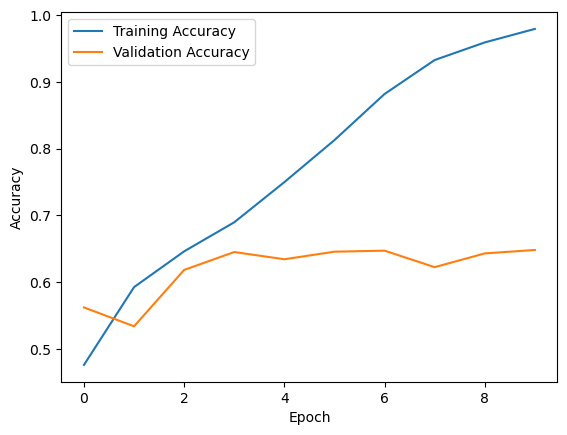

In [8]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Assuming you have already trained and compiled the model as shown in the previous code
# and you have a new image file named 'new_image.jpg' that you want to classify.

from keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and preprocess the new image
new_image_filename = './test/xyz.jpeg'
new_image = load_img(new_image_filename, target_size=(img_width, img_height))
new_image_array = img_to_array(new_image)
new_image_array = new_image_array / 255.0  # Normalize pixel values between 0 and 1
new_image_array = np.expand_dims(new_image_array, axis=0)  # Add batch dimension

# Make prediction
predictions = model.predict(new_image_array)

# The 'predictions' variable contains an array of softmax probabilities for each class.
# To get the class labels and their respective probabilities, you can do the following:

class_labels = label_encoder.classes_
predicted_class_index = np.argmax(predictions[0])
predicted_class_label = class_labels[predicted_class_index]
predicted_probabilities = predictions[0]

print("Predicted Class:", predicted_class_label)
print("Predicted Probabilities:", predicted_probabilities)


1/1 [==============================] - 0s 34ms/step
Predicted Class: Strawberry
Predicted Probabilities: [9.0320775e-08 9.2221892e-27 1.2214607e-13 1.5985436e-23 9.9999988e-01]
